In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


####################### Models ###########################
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


###################### Feature Reduction ########################
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.feature_selection import RFE

###################### Metrics #######################
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
        accuracy_score,  precision_score, recall_score, f1_score, fbeta_score, make_scorer

In [2]:
df_train = pd.read_csv("data/train_data.csv")
X_train, y_train = df_train.drop("num", axis=1), df_train["num"]

df_test = pd.read_csv("data/test_data.csv")
X_test, y_test = df_test.drop("num", axis=1), df_train["num"]

In [4]:
X_train.head()

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.276596,0.111111,0.056522,0.000000,0.392308,0.33,0.142857,0.285714,0.200000,0.285714,...,False,False,True,True,False,False,True,False,True,False
1,0.659574,0.324074,0.173913,0.272727,0.523077,0.34,0.142857,0.285714,0.485714,0.571429,...,False,True,False,True,False,True,False,False,False,True
2,0.574468,0.444444,0.434783,0.272727,0.523077,0.51,0.714286,0.714286,0.571429,0.500000,...,False,False,True,True,False,True,False,False,False,True
3,0.617021,0.814815,0.152174,0.272727,0.461538,0.33,0.580000,0.428571,0.428571,0.400000,...,True,False,False,False,True,False,True,False,True,False
4,0.680851,0.259259,0.217391,0.363636,0.561538,0.25,0.571429,0.428571,0.314286,0.571429,...,False,False,True,True,False,True,False,False,False,True


In [5]:
y_train.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: num, dtype: float64

In [7]:
X_test.head()

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.829787,0.629630,0.195652,0.272727,0.538462,0.39,0.714286,0.428571,0.428571,0.285714,...,False,False,True,True,False,False,True,False,False,True
1,0.872340,0.277778,0.156522,0.363636,0.184615,-0.02,0.200000,0.057143,0.200000,0.285714,...,False,False,True,True,False,False,False,True,False,True
2,0.340426,0.259259,0.347826,0.272727,0.630769,0.53,0.357143,0.571429,0.285714,0.428571,...,True,False,False,False,True,True,False,False,True,False
3,0.808511,0.166667,0.282609,0.454545,0.300000,0.27,0.392857,0.000000,0.285714,0.471429,...,False,True,False,False,True,False,False,True,False,True
4,0.574468,0.259259,0.326087,0.236364,0.246154,0.16,0.214286,0.285714,0.357143,0.328571,...,False,False,True,True,False,False,True,False,True,False


In [8]:
y_test.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: num, dtype: float64

In [3]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# Models plantejats

Anem a plantejar models tenint en compte que volem un classificador que utilitzi variables numèriques i categòriques i que sigui compatible amb valors NaN.

Possibles models:

-  Naive Bayes
- QDA
- LDA
- Logistic regression
-   KNN
-   Random forest
-   Gradient boosting
-   SVC

Definim les mètriques

In [ ]:
fbeta_scorer = make_scorer(fbeta_score, beta=2)

scoring = {
    'f2': fbeta_scorer,
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

results_df = pd.DataFrame(index=[], columns= ['F2', 'Accuracy', 'F1', 'Precision', 'Recall'])
importance = pd.DataFrame(index=[])

## **Discriminant Analysis**



Hem de transformar les variables numèriques en gaussianes

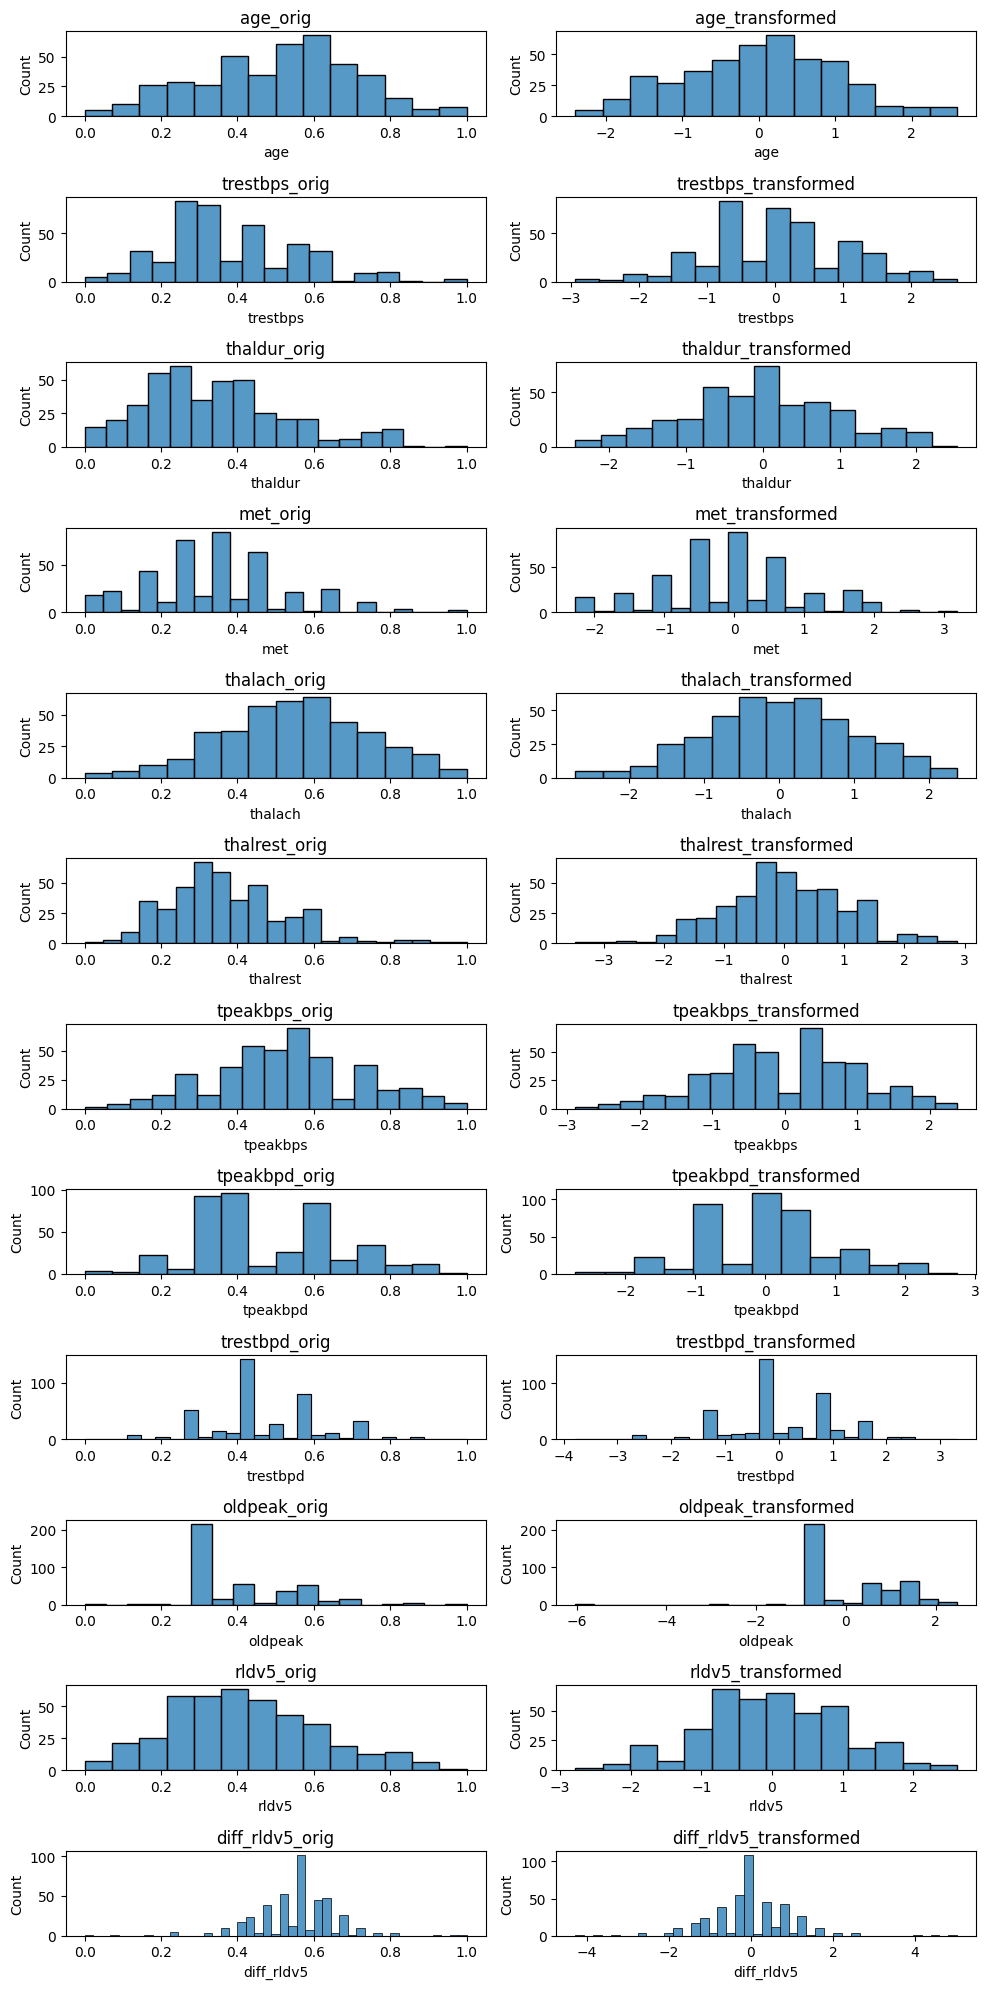

In [ ]:
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

pt = PowerTransformer(method='yeo-johnson')

X_train_transformed[num_cols] = pt.fit_transform(X_train_transformed[num_cols])
X_test_transformed[num_cols] = pt.transform(X_test_transformed[num_cols])

fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 20))


for i, c in enumerate(num_cols):
    # El primer subplot en la fila i, columna 0 para el original
    ax1 = axes[i, 0]
    sns.histplot(x=c, data=X_train, ax=ax1)
    ax1.set_title(f"{c}_orig")

    # El segundo subplot en la fila i, columna 1 para el transformado
    ax2 = axes[i, 1]
    sns.histplot(x=c, data=X_train_transformed, ax=ax2)
    ax2.set_title(f"{c}_transformed")

plt.tight_layout()
plt.show()

### Naive Bayes

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    bnb = BernoulliNB()
    gnb = GaussianNB()
    gnb.fit(X_train_num, _y_train)
    bnb.fit(X_train_cat, _y_train)

    num_probs = gnb.predict_proba(X_val_num)
    cat_probs = bnb.predict_proba(X_val_cat)

    combined_probs = num_probs * cat_probs
    combined_probs = combined_probs / combined_probs.sum(axis=1, keepdims=True)
    y_pred_cv = np.argmax(combined_probs, axis=1)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['Naive Bayes'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.84337,0.799684,0.832822,0.816933,0.850884


### QDA

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(_X_train, _y_train)
    y_pred_cv = qda.predict(_X_val)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['QDA'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238


### LDA

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    lda = LinearDiscriminantAnalysis()
    lda.fit(_X_train, _y_train)
    y_pred_cv = lda.predict(_X_val)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['LDA'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
LDA,0.847546,0.816322,0.843403,0.839165,0.851039


In [ ]:
# retorna model fitejat i parametres optims
def validar_model(name, model, params, train_x, train_y, verbose = False, return_crossval_results = False):
  grid_search = GridSearchCV(estimator=model,
                            param_grid=params,
                            cv=5, scoring = scoring,
                            return_train_score=False,
                            refit='f2', n_jobs=-1)

  grid_search.fit(train_x, train_y)

  cross_val_results = pd.DataFrame(grid_search.cv_results_)
  filtered_results = cross_val_results

  if verbose:
    for i in range(len(cross_val_results)):
          param_combination = cross_val_results.loc[i, 'params']
          mean_test_f2 = cross_val_results.loc[i, 'mean_test_f2']
          mean_test_f1 = cross_val_results.loc[i, 'mean_test_f1']
          mean_test_accuracy = cross_val_results.loc[i, 'mean_test_accuracy']
          mean_test_precision = cross_val_results.loc[i, 'mean_test_precision']
          mean_test_recall = cross_val_results.loc[i, 'mean_test_recall']

          print(f"Params: {param_combination}")
          print(f"mean_test_f2: {mean_test_f2}")
          print(f"mean_test_f1: {mean_test_f1}")
          print(f"mean_test_accuracy: {mean_test_accuracy}")
          print(f"mean_test_precision: {mean_test_precision}")
          print(f"mean_test_recall: {mean_test_recall}")
          print("-" * 40)

  for param, value in grid_search.best_params_.items():
    filtered_results = filtered_results[filtered_results[f'param_{param}'] == value]
  fresults = filtered_results[['mean_test_f2', 'mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']].mean().values
  results_df.loc[name] = fresults

  if not return_crossval_results:
    return grid_search.best_estimator_, grid_search.best_params_
  else:
    return grid_search.best_estimator_, grid_search.best_params_, fresults



## **Regressió logística**


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Params: {'C': 0, 'solver': 'liblinear'}
mean_test_f2: nan
mean_test_f1: nan
mean_test_accuracy: nan
mean_test_precision: nan
mean_test_recall: nan
----------------------------------------
Params: {'C': 0, 'solver': 'lbfgs'}
mean_test_f2: nan
mean_test_f1: nan
mean_test_accuracy: nan
mean_test_precision: nan
mean_test_recall: nan
----------------------------------------
Params: {'C': 0.0001, 'solver': 'liblinear'}
mean_test_f2: 0.8823454971530929
mean_test_f1: 0.7500058719906046
mean_test_accuracy: 0.6085771658060815
mean_test_precision: 0.6000355532337117
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.0001, 'solver': 'lbfgs'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'solver': 'liblinear'}
mean_test_f2: 0.8861071727332634
mean_test_f1: 0.7993122069496525
mean_test_accura

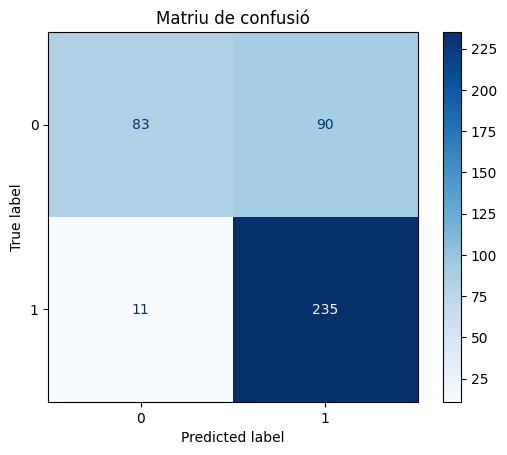

Prediccions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 1]
[[ 2.20411455e-02  1.12787287e-02 -4.83764675e-03  4.58143740e-03
  -3.06644416e-03 -6.56547068e-04  5.82502048e-03  3.43656892e-03
   8

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
LDA,0.847546,0.816322,0.843403,0.839165,0.851039
Logistic regression,0.886107,0.718359,0.799312,0.687502,0.955510


In [ ]:
model = LogisticRegression(max_iter=10000, random_state=1234, n_jobs=-1)
param_grid = {
    'C': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver': ['liblinear', 'lbfgs']
}

logreg, logreg_params = validar_model("Logistic regression", model, param_grid, X_train, y_train)

print(logreg_params)
results_df

## **KNN**

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn, knn_params = validar_model("KNN", model, param_grid, X_train, y_train)

print(knn_params)
results_df

Params: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
mean_test_f2: 0.6801775728757999
mean_test_f1: 0.7379848703914815
mean_test_accuracy: 0.7327882960413081
mean_test_precision: 0.8624392892968744
mean_test_recall: 0.6466938775510205
----------------------------------------
Params: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
mean_test_f2: 0.7941902986728675
mean_test_f1: 0.7904804708275852
mean_test_accuracy: 0.7518359150889271
mean_test_precision: 0.7848869417080978
mean_test_recall: 0.7968163265306123
----------------------------------------
Params: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
mean_test_f2: 0.6943608169971996
mean_test_f1: 0.747834411583109
mean_test_accuracy: 0.7399311531841652
mean_test_precision: 0.8610108810108811
mean_test_recall: 0.6631020408163265
----------------------------------------
Params: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
mean_test_f2: 0.7978570479929744
mean_test_f1: 0.7996545880240521
mean_test_accuracy: 0.76617900172117

,F2,Accuracy,F1,Precision,Recall
Gradient boosting lololo ninguna removed,0.885766,0.847189,0.873323,0.853721,0.894367
Gradient boosting painloc_0 removed,0.885907,0.830436,0.862550,0.827553,0.902612
Gradient boosting painloc_1 removed,0.886911,0.842398,0.870358,0.844589,0.898449
Gradient boosting relrest_0 removed,0.885177,0.828084,0.860890,0.824426,0.902531
Gradient boosting cp_1 removed,0.885433,0.837608,0.867163,0.839867,0.898531
Gradient boosting relrest_1 removed,0.885000,0.785141,0.834332,0.763203,0.923020
Gradient boosting trestbps removed,0.888813,0.839960,0.869339,0.839483,0.902531
Gradient boosting cp_4 removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting met removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting thalrest removed,0.893798,0.806741,0.848616,0.783688,0.927102


## **Random forest**

Params: {'max_features': 'sqrt', 'n_estimators': 1}
mean_test_f2: 0.7722363991163148
mean_test_f1: 0.773193537420766
mean_test_accuracy: 0.7374354561101549
mean_test_precision: 0.7780555555555556
mean_test_recall: 0.772326530612245
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 5}
mean_test_f2: 0.8011486713404139
mean_test_f1: 0.8017047679286768
mean_test_accuracy: 0.7685025817555937
mean_test_precision: 0.8038040396261421
mean_test_recall: 0.801061224489796
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 25}
mean_test_f2: 0.8626354367476331
mean_test_f1: 0.8461662559086378
mean_test_accuracy: 0.813740676993689
mean_test_precision: 0.820555144202203
mean_test_recall: 0.8741224489795918
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 50}
mean_test_f2: 0.8514441011251973
mean_test_f1: 0.8422776318448172
mean_test_accuracy: 0.8113023522662075
mean_test_precision: 

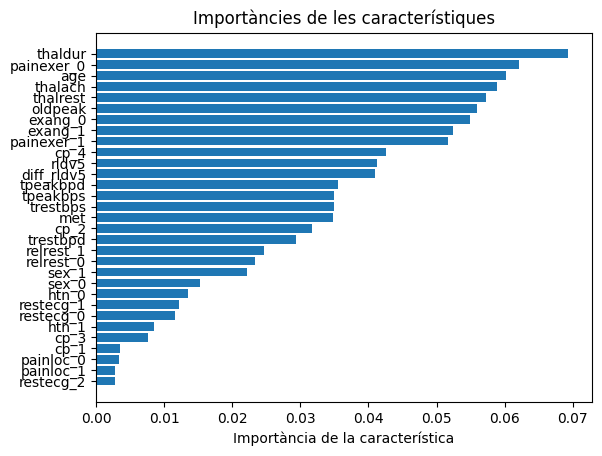

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
LDA,0.847546,0.816322,0.843403,0.839165,0.851039
Logistic regression,0.886107,0.718359,0.799312,0.687502,0.955510
KNN,0.849989,0.806713,0.838605,0.821299,0.858041
Random forest,0.870325,0.830436,0.859251,0.841999,0.878041


In [ ]:
model = RandomForestClassifier(random_state=1234, n_jobs=-1, max_depth=None)
param_grid = {
    'n_estimators': [1, 5, 25, 50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    #'max_depth': [None]
}

rf, rf_params, crossval_results = validar_model("Random forest", model, param_grid, X_train, y_train, True)

print(rf_params)
results_df

<ipython-input-55-6e862f49ac0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_val_results['param_max_features'] = cross_val_results['param_max_features'].astype(str)
<ipython-input-55-6e862f49ac0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_val_results['param_n_estimators'] = cross_val_results['param_n_estimators'].astype(str)
<ipython-input-55-6e862f49ac0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

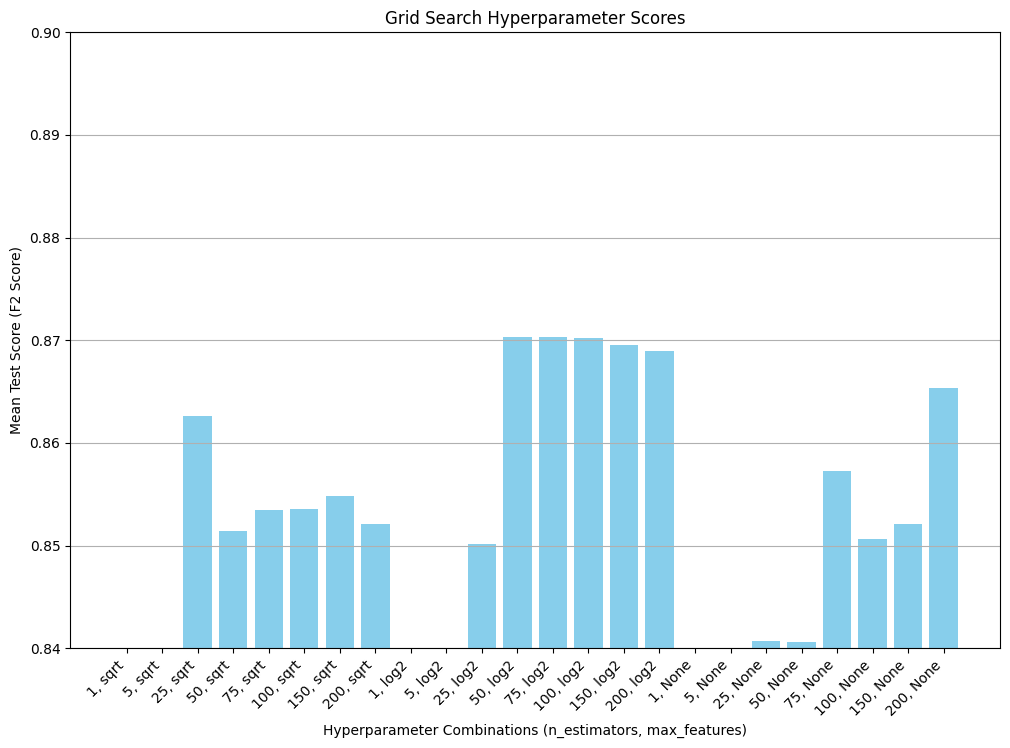

In [ ]:
cols_of_interest = ['param_n_estimators', 'param_max_features', 'mean_test_f2']
cross_val_results = crossval_results[cols_of_interest]

# Convertir las columnas de parámetros a strings para una mejor visualización
cross_val_results['param_max_features'] = cross_val_results['param_max_features'].astype(str)
cross_val_results['param_n_estimators'] = cross_val_results['param_n_estimators'].astype(str)


cross_val_results['params'] = cross_val_results['param_n_estimators'] + ', ' + cross_val_results['param_max_features']

Ncross_val_results = cross_val_results.sort_values(by='mean_test_f2', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(cross_val_results['params'], cross_val_results['mean_test_f2'], color='skyblue')
plt.xlabel('Hyperparameter Combinations (n_estimators, max_features)')
plt.ylabel('Mean Test Score (F2 Score)')
plt.ylim(0.84, 0.9)
plt.title('Grid Search Hyperparameter Scores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


## **Gradient boosting**

In [ ]:
model = GradientBoostingClassifier(random_state=1234)

param_grid = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [1, 5, 25, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [3, 4, 5]
}

gb, gb_params, crossval_results = validar_model("Gradient boosting", model, param_grid, X_train, y_train, True)

print(gb_params)
results_df

Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 1}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 5}
mean_test_f2: 0.8850000703679826
mean_test_f1: 0.8343324791150877
mean_test_accuracy: 0.785140562248996
mean_test_precision: 0.7632032660721186
mean_test_recall: 0.9230204081632654
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 25}
mean_test_f2: 0.8596195434854419
mean_test_f1: 0.8334876271835207
mean_test_accuracy: 0.7947217441193344
mean_test_precision: 0.7945487032946247
mean_test_recall: 0.8783673469387756
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 5

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
Gradient boosting,0.885766,0.847189,0.873323,0.853721,0.894367


## **SVM**

In [ ]:
param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'degree': [2, 3, 4, 5]  # només pel kernel poly
}

model = SVC(random_state=1234)

svc, svc_params = validar_model("SVC", model, param_grid, X_train, y_train)

print(svc_params)
results_df

Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.587119

,F2,Accuracy,F1,Precision,Recall
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
LDA,0.847546,0.816322,0.843403,0.839165,0.851039
Logistic regression,0.886107,0.718359,0.799312,0.687502,0.955510
KNN,0.849989,0.806713,0.838605,0.821299,0.858041
Random forest,0.870325,0.830436,0.859251,0.841999,0.878041
Gradient boosting,0.885766,0.847189,0.873323,0.853721,0.894367
SVC,0.897520,0.732731,0.810022,0.697344,0.967510


In [ ]:
results_df.sort_values(by=results_df.columns[0])

,F2,Accuracy,F1,Precision,Recall
QDA,0.801474,0.761474,0.794262,0.794113,0.809238
Naive Bayes,0.843370,0.799684,0.832822,0.816933,0.850884
LDA,0.847546,0.816322,0.843403,0.839165,0.851039
KNN,0.849989,0.806713,0.838605,0.821299,0.858041
Random forest,0.870325,0.830436,0.859251,0.841999,0.878041
Gradient boosting,0.885766,0.847189,0.873323,0.853721,0.894367
Logistic regression,0.886107,0.718359,0.799312,0.687502,0.955510
SVC,0.897520,0.732731,0.810022,0.697344,0.967510


# Feature reduction

## Gradient boosting

In [ ]:
def plot_importances(model):
  '''just for random forest and gradient boosting'''
  importances = model.feature_importances_
  indices = np.argsort(importances)
  print(X_train.columns[indices[0]])

    # Crear el gráfico
  fig, ax = plt.subplots()
  ax.barh(range(len(importances)), importances[indices])
  ax.set_yticks(range(len(importances)))
  ax.set_yticklabels(np.array(X_train.columns)[indices])
  ax.set_xlabel("Importància de la característica")
  ax.set_title("Importàncies de les característiques")
  plt.show()


painloc_1


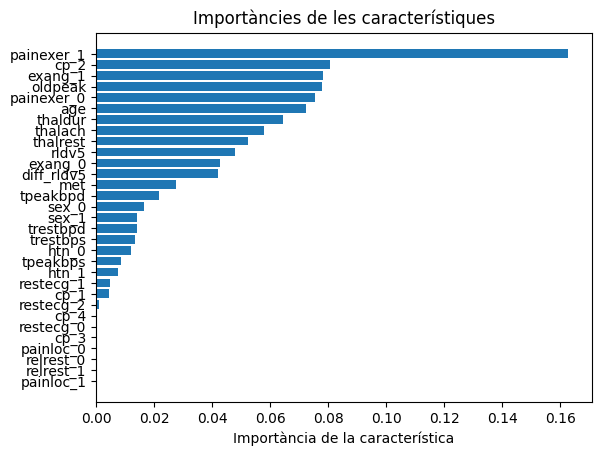

In [ ]:
plot_importances(gb)

In [ ]:
removed_cols = []
num_features = X_train.shape[1]

performance_df = pd.DataFrame(columns=['num_features', 'f2', 'f1', 'accuracy', 'precision', 'recall', 'removed_feature'])

model = GradientBoostingClassifier(random_state=1234)


X_copy = X_train.copy()

param_grid = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [5, 25, 50, 75, 100],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [3, 4, 5]
}

least_important_feature = "ninguna"

# Iterar eliminando la característica menos importante hasta que queden la mitad
while num_features > 15:
    print("num features", num_features)
    gb, gb_params, crossval_results = validar_model(f"Gradient boosting {least_important_feature} removed", model, param_grid, X_copy, y_train, True)

    importances = gb.feature_importances_
    least_important_idx = np.argmin(importances)
    least_important_feature = X_copy.columns[least_important_idx]
    print(least_important_feature)
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'num_features': num_features,
        'f2': crossval_results[0],
        'accuracy': crossval_results[1],
        'f1': crossval_results[2],
        'precision': crossval_results[3],
        'recall': crossval_results[4],
        'removed_feature': [least_important_feature]
    })], ignore_index=True)

    X_copy.drop(least_important_feature, axis=1, inplace=True)

    num_features -= 1

results_df

num features 31
painloc_0
num features 30
painloc_1
num features 29
relrest_0
num features 28
cp_1
num features 27
relrest_1
num features 26
trestbps
num features 25
cp_4
num features 24
met
num features 23
thalrest
num features 22
tpeakbps
num features 21
trestbpd
num features 20
rldv5
num features 19
diff_rldv5
num features 18
cp_2
num features 17
sex_0
num features 16
cp_3


,F2,Accuracy,F1,Precision,Recall
Gradient boosting ninguna removed,0.885766,0.847189,0.873323,0.853721,0.894367
Gradient boosting painloc_0 removed,0.885907,0.830436,0.862550,0.827553,0.902612
Gradient boosting painloc_1 removed,0.886911,0.842398,0.870358,0.844589,0.898449
Gradient boosting relrest_0 removed,0.885177,0.828084,0.860890,0.824426,0.902531
Gradient boosting cp_1 removed,0.885433,0.837608,0.867163,0.839867,0.898531
Gradient boosting relrest_1 removed,0.885000,0.785141,0.834332,0.763203,0.923020
Gradient boosting trestbps removed,0.888813,0.839960,0.869339,0.839483,0.902531
Gradient boosting cp_4 removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting met removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting thalrest removed,0.893798,0.806741,0.848616,0.783688,0.927102


In [ ]:
performance_df

,num_features,f2,f1,accuracy,precision,recall,removed_feature
0,31,0.885766,0.873323,0.847189,0.853721,0.894367,painloc_0
1,30,0.885907,0.862550,0.830436,0.827553,0.902612,painloc_1
2,29,0.886911,0.870358,0.842398,0.844589,0.898449,relrest_0
3,28,0.885177,0.860890,0.828084,0.824426,0.902531,cp_1
4,27,0.885433,0.867163,0.837608,0.839867,0.898531,relrest_1
5,26,0.885000,0.834332,0.785141,0.763203,0.923020,trestbps
6,25,0.888813,0.869339,0.839960,0.839483,0.902531,cp_4
7,24,0.892782,0.841605,0.794779,0.769761,0.931184,met
8,23,0.892782,0.841605,0.794779,0.769761,0.931184,thalrest
9,22,0.893798,0.848616,0.806741,0.783688,0.927102,tpeakbps


C:\Users\laiam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laiam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laiam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laiam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

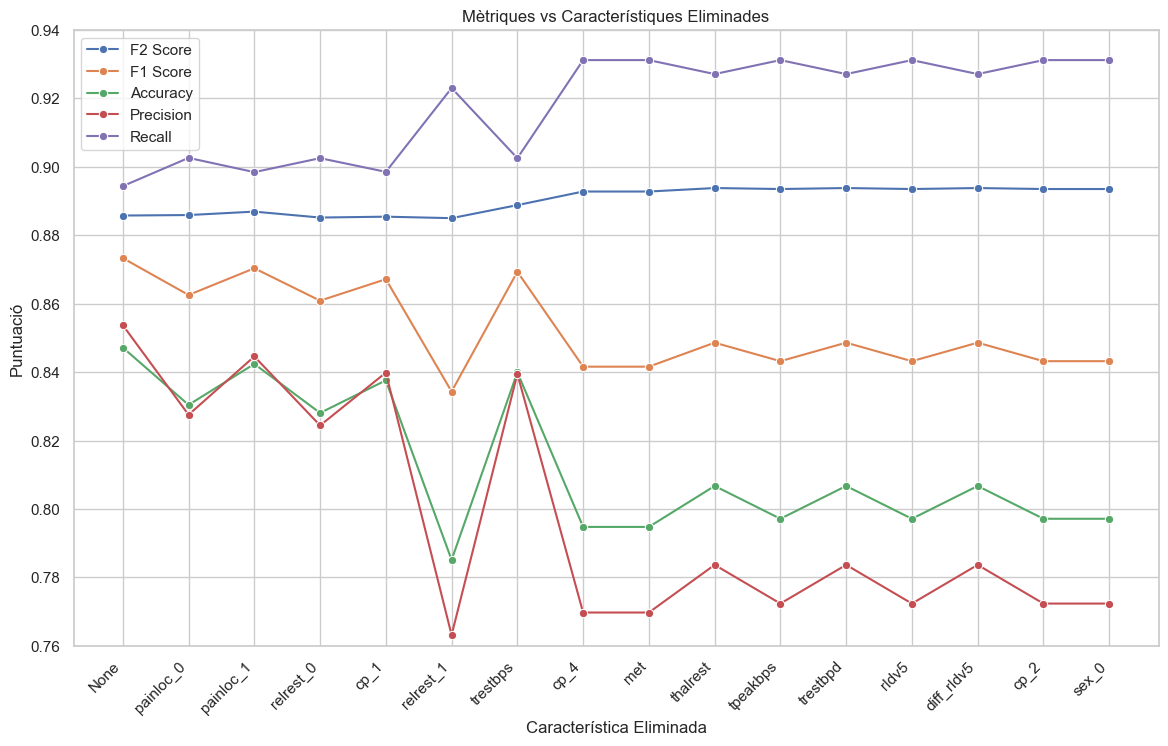

In [4]:
# Eliminar l'última fila corresponent a la característica 'cp_3'
performance_df = performance_df[performance_df['removed_feature'] != 'cp_3']

# Establir l'estil del gràfic
sns.set(style="whitegrid")

# Crear una figura i eixos
plt.figure(figsize=(14, 8))

# Graficar les mètriques
sns.lineplot(data=performance_df, x='removed_feature', y='f2', label='F2 Score', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='f1', label='F1 Score', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='accuracy', label='Accuracy', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='precision', label='Precision', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='recall', label='Recall', marker='o')


plt.xticks(rotation=45, ha='right')
plt.ylim(0.76, 0.94)
plt.title('Mètriques vs Característiques Eliminades')
plt.xlabel('Característica Eliminada')
plt.ylabel('Puntuació')
plt.legend()

plt.show()

In [ ]:
X_train_def = X_train.copy()
X_train_def.drop(["painloc_0","painloc_1","relrest_0","cp_1","relrest_1","trestbps"], axis = 1, inplace = True)
model = GradientBoostingClassifier(random_state=1234)
gb_def, gb_params_def, crossval_results_def = validar_model(f"Gradient boosting DEF", model, param_grid, X_train_def, y_train, True)
results_df

,F2,Accuracy,F1,Precision,Recall
Gradient boosting ninguna removed,0.885766,0.847189,0.873323,0.853721,0.894367
Gradient boosting painloc_0 removed,0.885907,0.830436,0.862550,0.827553,0.902612
Gradient boosting painloc_1 removed,0.886911,0.842398,0.870358,0.844589,0.898449
Gradient boosting relrest_0 removed,0.885177,0.828084,0.860890,0.824426,0.902531
Gradient boosting cp_1 removed,0.885433,0.837608,0.867163,0.839867,0.898531
Gradient boosting relrest_1 removed,0.885000,0.785141,0.834332,0.763203,0.923020
Gradient boosting trestbps removed,0.888813,0.839960,0.869339,0.839483,0.902531
Gradient boosting cp_4 removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting met removed,0.892782,0.794779,0.841605,0.769761,0.931184
Gradient boosting thalrest removed,0.893798,0.806741,0.848616,0.783688,0.927102


In [ ]:
plot_importances()

# Elecció del model i estimació de l'error de generalització

In [ ]:
X_test_def = X_test.copy()
X_test_def.drop(["painloc_0","painloc_1","relrest_0","cp_1","relrest_1","trestbps"], axis = 1, inplace = True)
y_pred = gb_def.predict(X_test_def)

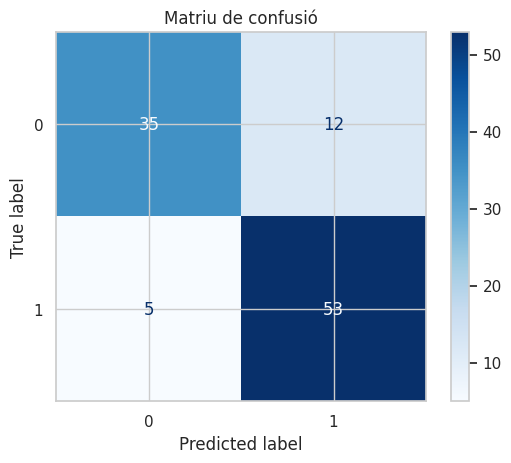

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Change 'binary' to 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

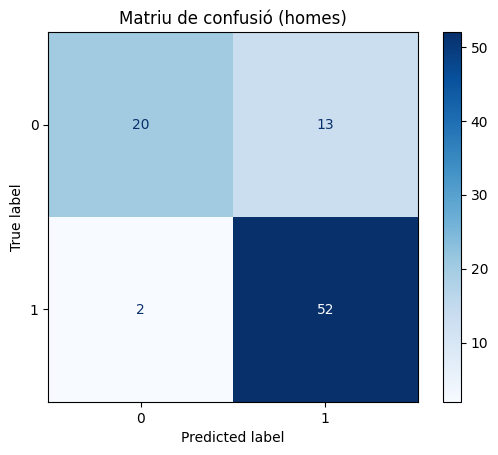

In [ ]:
conf_matrix = confusion_matrix(y_test.iloc[X_test[X_test["sex_0"]==False].index], y_pred[X_test[X_test["sex_0"]==False].index])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió (homes)')
plt.show()

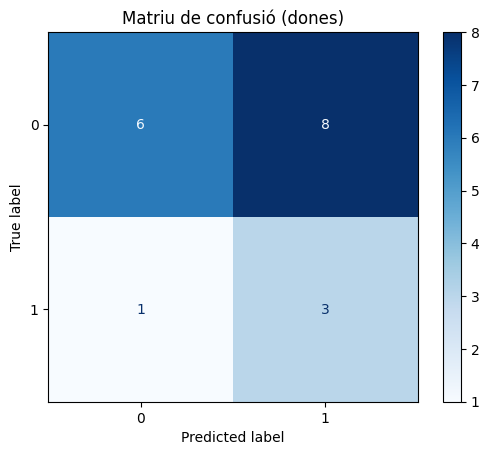

In [ ]:
conf_matrix = confusion_matrix(y_test.iloc[X_test[X_test["sex_0"]==True].index], y_pred[X_test[X_test["sex_0"]==True].index])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió (dones)')
plt.show()